In [1]:
import osmnx as ox

# Definir el lugar de estudio (en este caso, Hermosillo)
place_name = "Hermosillo, Sonora, Mexico"


In [2]:
# Obtener el grafo de la ciudad de Hermosillo
graph = ox.graph_from_place(place_name, network_type="all")


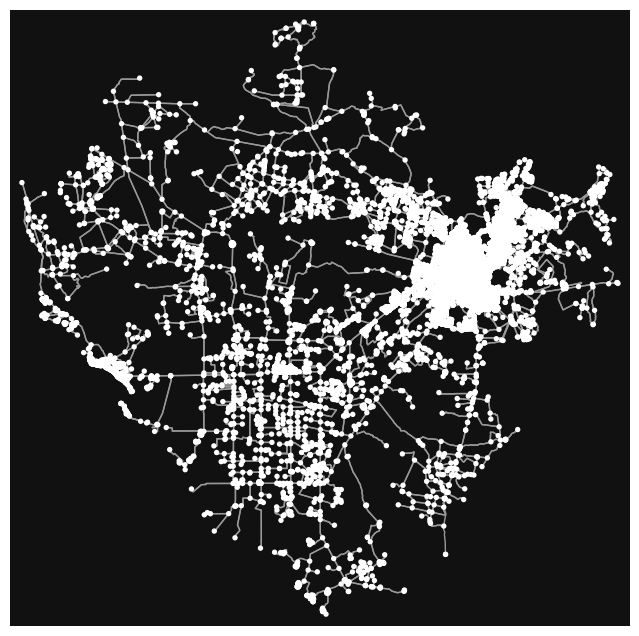

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
type(graph)
# Visualizar el grafo
# Rotar el grafo en 45 grados
ox.plot_graph(graph)

In [4]:
import pandas as pd

In [5]:
# Convertir los nodos en un DataFrame
nodes_df = ox.graph_to_gdfs(graph, edges=False)

# Convertir las aristas en un DataFrame
edges_df = ox.graph_to_gdfs(graph, nodes=False)

# Mostrar los primeros 5 registros de cada DataFrame
print("Nodos DataFrame:")
print(nodes_df.head())

print("\nAristas DataFrame:")
print(edges_df.head())

Nodos DataFrame:
                   y           x  street_count highway  \
osmid                                                    
316362546  28.568813 -111.391317             4     NaN   
336150447  28.545818 -111.494328             1     NaN   
336150480  28.353363 -111.301929             1     NaN   
498658549  28.568752 -111.473377             4     NaN   
498658552  28.568613 -111.555074             4     NaN   

                              geometry  
osmid                                   
316362546  POINT (-111.39132 28.56881)  
336150447  POINT (-111.49433 28.54582)  
336150480  POINT (-111.30193 28.35336)  
498658549  POINT (-111.47338 28.56875)  
498658552  POINT (-111.55507 28.56861)  

Aristas DataFrame:
                              osmid             ref         name  \
u         v          key                                           
316362546 3173455691 0    566790774  SON 110;SON 26     Calle 26   
          8672499462 0    566802152          SON 61  Calle 4 Sur 

In [6]:
nodes_df.to_csv("nodes_hermosillo.csv")
edges_df.to_csv("edges_hermosillo.csv")

print("Archivos CSV guardados exitosamente.")

Archivos CSV guardados exitosamente.


In [7]:
from geopy.distance import great_circle

In [8]:
edges_gdf = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [9]:
node_distances = {}
for u, v, data in graph.edges(data=True):
    distance = data['length']
    if v not in node_distances:
        node_distances[v] = distance
    else:
        node_distances[v] += distance

In [10]:
nodes_gdf = ox.graph_to_gdfs(graph, nodes=True, edges=False)
nodes_gdf['accumulated_distance'] = nodes_gdf.index.map(node_distances)

# Guardar el DataFrame de nodos con la distancia acumulada en un archivo CSV
nodes_gdf.to_csv("nodes_with_accumulated_distance.csv", index=False)

print("Archivo CSV de nodos con distancia acumulada guardado exitosamente.")

Archivo CSV de nodos con distancia acumulada guardado exitosamente.


In [11]:
# Agregar el atributo de longitud a las aristas del grafo
for u, v, data in graph.edges(data=True):
    data['length'] = great_circle((graph.nodes[u]['y'], graph.nodes[u]['x']),
                                   (graph.nodes[v]['y'], graph.nodes[v]['x'])).meters

# Agregar el atributo de velocidad promedio a todas las aristas (puedes ajustar este valor según tu conocimiento o datos)
for u, v, data in graph.edges(data=True):
    data['speed_kph'] = 30  # Por ejemplo, velocidad promedio de 30 km/h

# Ahora, puedes intentar nuevamente agregar los tiempos de viaje estimados
ox.speed.add_edge_travel_times(graph)

edges_df = ox.graph_to_gdfs(graph, nodes=False, edges=True)


In [12]:
print(edges_df[['travel_time']])

                           travel_time
u          v          key             
316362546  3173455691 0            9.4
           8672499462 0            3.5
           6542895733 0          136.5
           6539614527 0          487.3
336150447  8520299664 0            5.5
...                                ...
4747621583 4747621587 0           12.7
           4747621591 0           58.1
4747621584 4747701417 0          123.4
4747621587 4747621583 0           12.7
7799735694 7799735651 0          160.6

[127623 rows x 1 columns]


In [13]:
edges_df.to_csv('edges_data.csv', index=False)

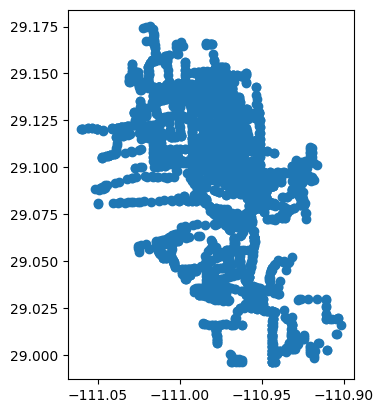

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to your Shapefile
shapefile_path = 'Paradas\Paradas_Hermosillo_unique.shp'

# Read the Shapefile
gdf = gpd.read_file(shapefile_path)

# Plot the data
gdf.plot()
plt.show()


In [15]:
# Print the first few rows of the GeoDataFrame
print(gdf.head())

# Get basic information about the GeoDataFrame
print(gdf.info())

# Get the coordinate reference system (CRS) of the GeoDataFrame
print(gdf.crs)


   field_1  Codigo  Linea                                      Nombre  \
0        1   101-1    101                       Monterrey y Garmendia   
1        2  501-47    501  Calle Garmendia y AV Dr. Alberto G Noriega   
2        3   102-3    102                          Garmendia y oaxaca   
3        4   101-4    101            Blvd. Luis Encinas y Pino Suarez   
4        5  401-82    401                         blvd. Luiis encinas   

    Latitude    Longitud  No_Lineas   L1   L2    L3  ...    L6    L7   L8  \
0  29.078525 -110.954248          2  101  102     0  ...     0     0    0   
1  29.079922 -110.954724          8  501  101   102  ...  1602  1902  902   
2  29.082563 -110.955281          6  102  501  1001  ...   101     0    0   
3  29.084578 -110.957564          9  101  102   501  ...  1602  1702  601   
4  29.086463 -110.962878          5  401  101   102  ...     0     0    0   

     L9  L10  L11  L12  L13 L14                     geometry  
0     0    0    0   NA   NA  NA  PO

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11820\2244815937.py:6: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


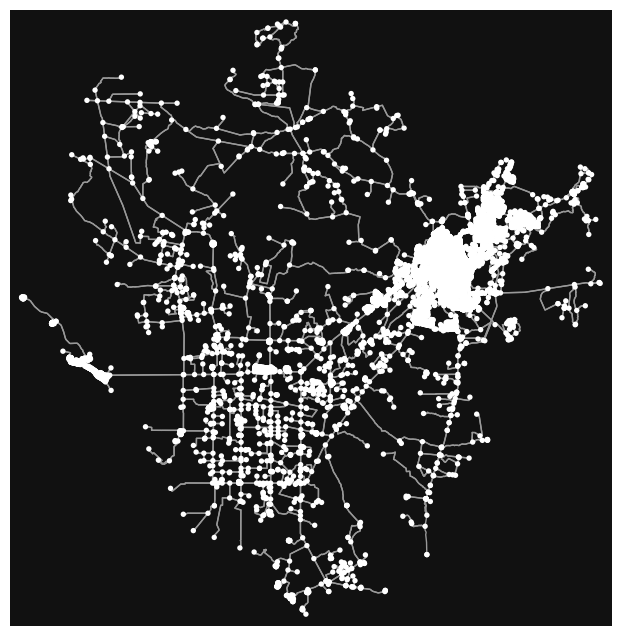

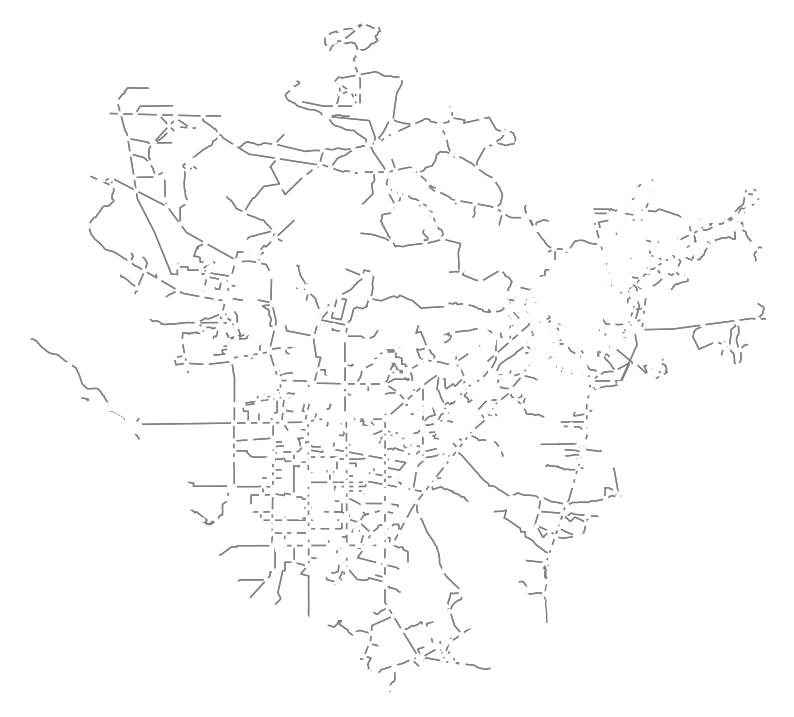

In [16]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Configure osmnx to use footprints (buildings) and streets
ox.config(use_cache=True, log_console=True)

# Specify the location
place_name = "Hermosillo, Sonora, Mexico"

# Download OSM street network
streets_graph = ox.graph_from_place(place_name, network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(streets_graph))

# Assuming you have a Shapefile for the same or overlapping area, let's load it
shapefile_path = 'Paradas\Paradas_Hermosillo_unique.shp'
gdf = gpd.read_file(shapefile_path)

# Project the GeoDataFrame to the same CRS as the OSM data
gdf_projected = gdf.to_crs(ox.project_graph(streets_graph).graph['crs'])

# Now, let's plot the Shapefile data on top of the OSM data
fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph(streets_graph, ax=ax, show=False, close=False, edge_color='gray')
gdf_projected.plot(ax=ax, color='red', markersize=5)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_11820\985782675.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for i, point in gdf.geometry.centroid.iteritems():


AttributeError: 'GeoSeries' object has no attribute 'iteritems'

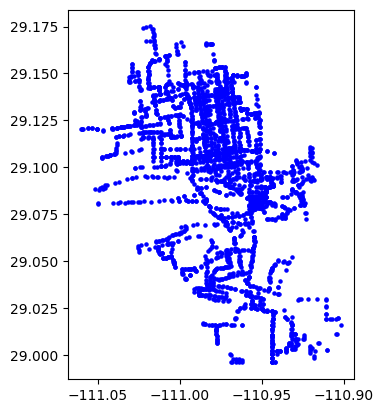

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ruta al archivo Shapefile
shapefile_path = 'Paradas\Paradas_Hermosillo_unique.shp'

# Leer el Shapefile
gdf = gpd.read_file(shapefile_path)

# Crear un gráfico de líneas conectando los puntos
fig, ax = plt.subplots()
gdf.plot(ax=ax, marker='o', color='blue', markersize=5)  # Graficar los puntos

# Conectar los puntos para formar un grafo
for i, point in gdf.geometry.centroid.iteritems():
    for j, other_point in gdf.geometry.centroid.iteritems():
        if i != j:  # Evitar conectar un punto consigo mismo
            ax.plot([point.x, other_point.x], [point.y, other_point.y], color='black', linewidth=0.5)

plt.show()


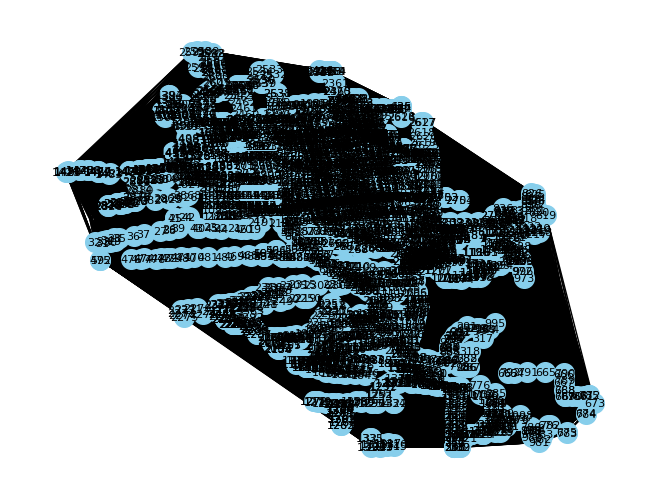

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

# Ruta al archivo Shapefile
shapefile_path = 'Paradas\Paradas_Hermosillo_unique.shp'

# Leer el Shapefile
gdf = gpd.read_file(shapefile_path)

# Crear un gráfico de NetworkX
G = nx.Graph()

# Agregar nodos al grafo
for idx, row in gdf.iterrows():
    G.add_node(idx, pos=(row.geometry.x, row.geometry.y))

# Agregar conexiones entre nodos (máximo 4 conexiones)
for idx1, row1 in gdf.iterrows():
    for idx2, row2 in gdf.iterrows():
        if idx1 != idx2:  # Evitar conexiones con el mismo nodo
            dist = row1.geometry.distance(row2.geometry)
            if dist <= 0.5:  # Establecer un umbral de distancia para la conexión
                G.add_edge(idx1, idx2)

# Dibujar el grafo
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=8)
plt.show()



C:\Users\Usuario\AppData\Local\Temp\ipykernel_9344\1477249137.py:6: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


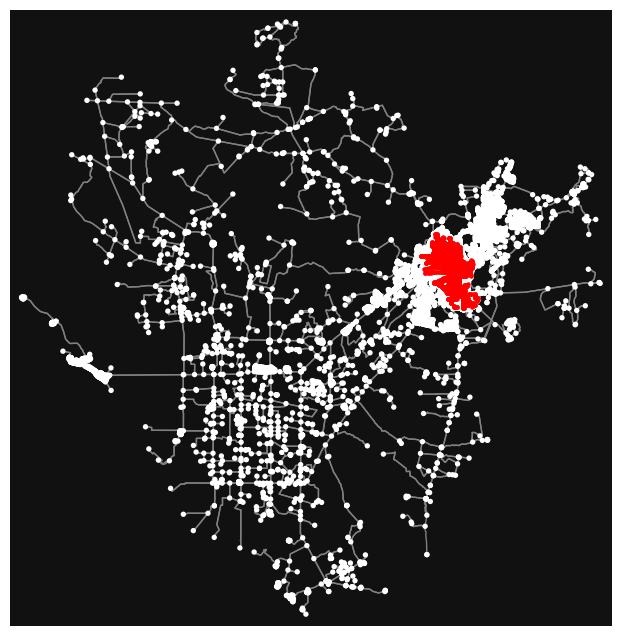

In [2]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Configure osmnx to use footprints (buildings) and streets
ox.config(use_cache=True, log_console=True)

# Specify the location
place_name = "Hermosillo, Sonora, Mexico"

# Download OSM street network
streets_graph = ox.graph_from_place(place_name, network_type='drive')

# Assuming you have a Shapefile for the same or overlapping area, let's load it
shapefile_path = 'Paradas\Paradas_Hermosillo_unique.shp'
gdf = gpd.read_file(shapefile_path)

# Project the GeoDataFrame to the same CRS as the OSM data
gdf_projected = gdf.to_crs(ox.project_graph(streets_graph).graph['crs'])

# Plot the OSM street network as edges
fig, ax = ox.plot_graph(ox.project_graph(streets_graph), show=False, close=False, edge_color='gray')

# Plot the Shapefile points
gdf_projected.plot(ax=ax, color='red', markersize=5)

plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9344\1803129183.py:6: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


ValueError: aspect must be finite and positive 

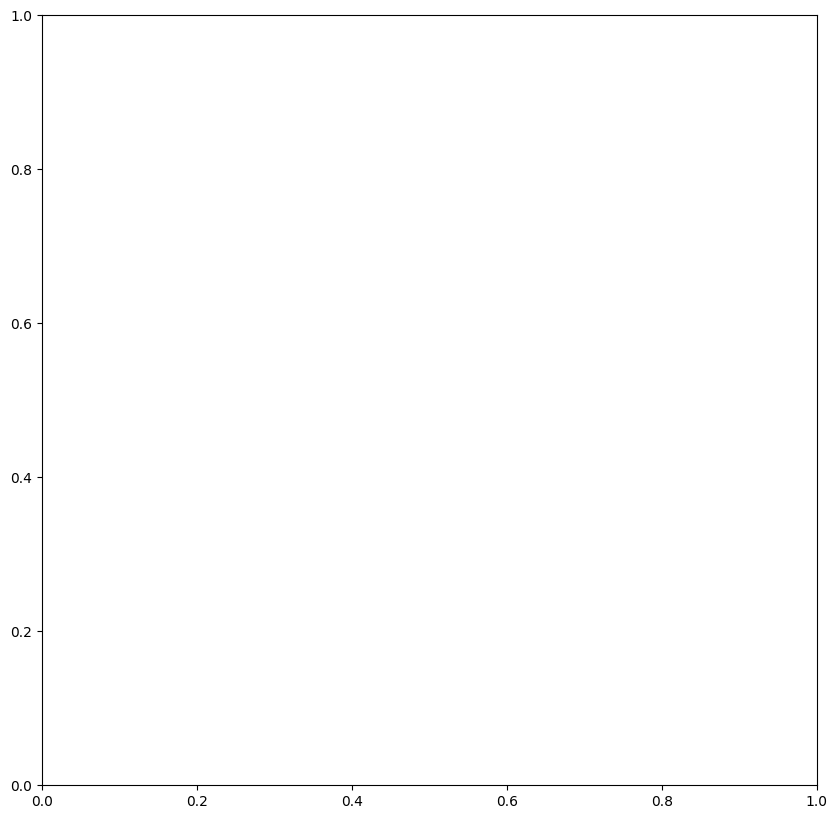

In [7]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Configure osmnx to use footprints (buildings) and streets
ox.config(use_cache=True, log_console=True)

# Specify the location
place_name = "Hermosillo, Sonora, Mexico"

# Download OSM street network
streets_graph = ox.graph_from_place(place_name, network_type='drive')

# Assuming you have a Shapefile for the same or overlapping area, let's load it
shapefile_path = 'Paradas/Paradas_Hermosillo_unique.shp'
gdf = gpd.read_file(shapefile_path)

# Project the GeoDataFrame to the same CRS as the OSM data
gdf_projected = gdf.to_crs(ox.project_graph(streets_graph).graph['crs'])

# Plot the OSM street network as edges only where the bus stops are
edges = ox.graph_to_gdfs(streets_graph, nodes=False, edges=True)
edges_with_stops = edges[edges.apply(lambda row: any(node in gdf_projected.geometry for node in row.geometry.coords), axis=1)]


# Plot the selected edges (streets) and the Shapefile points (bus stops)
fig, ax = plt.subplots(figsize=(10, 10))  # Crear una nueva figura con un tamaño específico
edges_with_stops.plot(ax=ax, color='black', linewidth=1)
gdf_projected.plot(ax=ax, color='red', markersize=5)

# Establecer el aspecto de la trama manualmente
ax.set_aspect('equal')

plt.show()




In [8]:
import geopandas as gpd
import osmnx as ox
import networkx as nx

# Cargar el archivo shapefile con los puntos de parada de autobuses
puntos_autobus = gpd.read_file('Paradas/Paradas_Hermosillo_unique.shp')

# Descargar el grafo de la ciudad de Hermosillo usando osmnx
ciudad = ox.graph_from_place('Hermosillo, Sonora, Mexico', network_type='all')

# Convertir los puntos de parada de autobuses a un formato compatible con osmnx
puntos_autobus_crs = puntos_autobus.to_crs(ciudad.graph['crs'])

# Encontrar los nodos más cercanos en el grafo de la ciudad para cada punto de parada de autobuses
nearest_nodes = ox.distance.nearest_nodes(ciudad, 
                                           puntos_autobus_crs.geometry.x, 
                                           puntos_autobus_crs.geometry.y)

# Añadir los puntos de parada de autobuses como nodos al grafo
for i, node in enumerate(nearest_nodes):
    grafo_completo.add_node(node, 
                            x=puntos_autobus_crs.geometry.x.iloc[i], 
                            y=puntos_autobus_crs.geometry.y.iloc[i], 
                            tipo='parada_autobus')

# Ahora puedes utilizar `grafo_completo` para realizar análisis de rutas o cualquier otra tarea que necesites.

# Por ejemplo, encontrar la ruta más corta entre dos puntos (nodos) en el grafo completo:
ruta_corta = nx.shortest_path(grafo_completo, source=source_node, target=target_node, weight='length')

AttributeError: module 'osmnx' has no attribute 'get_nearest_node'